In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel('data/melt.xlsx')

In [3]:
df1.head()

,Resource Name,AGID,Project/SSCR name,Planned Release month,Project Role,Legato Manager Name,Anthem Manager,Project Model,Total Planned Hours,Total Actual Hours,Total Remaining Hours,Effort Type,Task Name,Hours
0,"Gangwar, Kamal",AF40660,Cotiviti Online & Adjustments Phase 1- Sep,September 2020,Senior Software Engineer,"Ghosh, Ayan",Saxon Joseph,Waterfall,96.0,125.0,-29.0,Planned,Requirements,400.0
1,"Gangwar, Kamal",AF40660,Others,NaN,Senior Software Engineer,"Ghosh, Ayan",Saxon Joseph,NaN,NaN,NaN,NaN,Planned,Requirements,NaN
2,"Gangwar, Kamal",AF40660,PV36064 Cotiviti Pre to Post Phase 3,June 2020,Senior Software Engineer,"Ghosh, Ayan",Saxon Joseph,Waterfall,52.0,7.5,44.5,Planned,Requirements,0.0
3,"Gangwar, Kamal",AF40660,PV36064_Cotiviti expansion,February 2020,Senior Software Engineer,"Ghosh, Ayan",Saxon Joseph,Waterfall,0.0,0.0,0.0,Planned,Requirements,NaN
4,"Gangwar, Kamal",AF40660,PV38761 ClaimXten Expansion,June 2020,Senior Software Engineer,"Ghosh, Ayan",Saxon Joseph,Waterfall,36.0,0.0,36.0,Planned,Requirements,200.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Resource Name          2604 non-null   object 
 1   AGID                   2604 non-null   object 
 2   Project/SSCR name      2604 non-null   object 
 3   Planned Release month  2232 non-null   object 
 4   Project Role           2604 non-null   object 
 5   Legato Manager Name    2604 non-null   object 
 6   Anthem Manager         2604 non-null   object 
 7   Project Model          2232 non-null   object 
 8   Total Planned Hours    2232 non-null   float64
 9   Total Actual Hours     2232 non-null   float64
 10  Total Remaining Hours  2232 non-null   float64
 11  Effort Type            2604 non-null   object 
 12  Task Name              2604 non-null   object 
 13  Hours                  606 non-null    float64
dtypes: float64(4), object(10)
memory usage: 284.9+ KB


In [5]:
df2 = df1.sample(20)

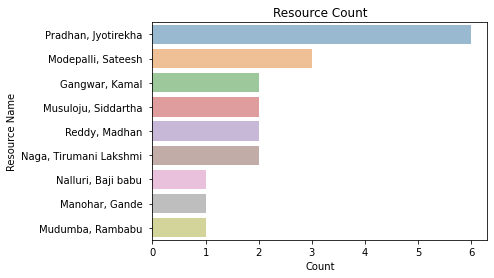

In [6]:
resource_count = df2['Resource Name'].value_counts()
plt.figure()
sns.barplot(y=resource_count.index, x=resource_count.values, alpha=0.5)
plt.title('Resource Count')
plt.xlabel('Count')
plt.ylabel('Resource Name')
plt.show()

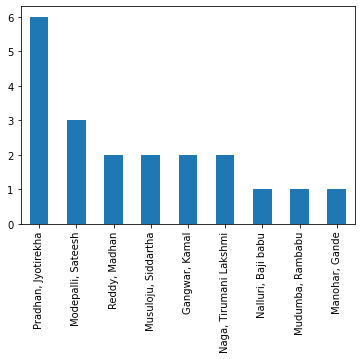

In [14]:
# Found out later the very useful plot() method of a series as well as the dataframe
# Which kindof simplifies above in one single line(so python-like)
df2['Resource Name'].value_counts().plot(kind='bar')
plt.show()


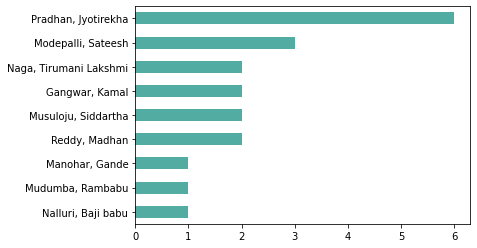

In [21]:
# Same as above with few tweaks
# Horizontal bar chart, and sorted the series based on counts to get a figure like below. Used a custom seleced "googled" hex color code.
df2['Resource Name'].value_counts().sort_values().plot(kind='barh', color='#52aca2')
plt.show()

In [8]:
df2.columns

Index(['Resource Name', 'AGID', 'Project/SSCR name', 'Planned Release month',
       'Project Role', 'Legato Manager Name', 'Anthem Manager',
       'Project Model', 'Total Planned Hours', 'Total Actual Hours',
       'Total Remaining Hours', 'Effort Type', 'Task Name', 'Hours'],
      dtype='object')

## 01. Index chaining

For Columns -
- Single Column Label
- List of Column Labels

For Rows -
- Integer Slices (end excluded)
- Boolean indexing based on column labels

Order does not matter, interpreter will know the axis being indexed by checking which of the above  
categories are being used.    
If Single/list of labels, then columns are being indexed  
If Slice or Boolean array/list/series bein used, then rows are being indexed

In [9]:
# Both below will give the same output
#df2[['AGID','Resource Name','Total Planned Hours','Total Actual Hours','Total Remaining Hours']][:6]
df2[:6][['AGID','Resource Name','Total Planned Hours','Total Actual Hours','Total Remaining Hours']]

,AGID,Resource Name,Total Planned Hours,Total Actual Hours,Total Remaining Hours
1268,AG34344,"Manohar, Gande",0.0,0.0,0.0
2353,AF40660,"Gangwar, Kamal",NaN,NaN,NaN
2322,AG63417,"Modepalli, Sateesh",NaN,NaN,NaN
2547,AG60852,"Naga, Tirumani Lakshmi",NaN,NaN,NaN
640,AG63417,"Modepalli, Sateesh",100.0,102.0,-2.0
1757,AG18454,"Pradhan, Jyotirekha",NaN,NaN,NaN


In [10]:
df2['Resource Name'] = df2['Resource Name'].str.strip()

## 02. "loc"

In [11]:
# In order to access by row labels, need to use "loc"
#1.  1 row -
df2.loc[1466]

KeyError: 1466

In [ ]:
#2. Multiple rows -
df2.loc[[1466, 1761]]

In [ ]:
#3. Row label slice (endpoints included)
df2.loc[1816:1047]

In [ ]:
#4. Boolean indexing of rows
df2.loc[df2['Resource Name']=='Reddy, Madhan']

In [ ]:
#5. Select rows by any of methods 1-4 above and then keep only Selected features
df2.loc[df2['Resource Name']=='Reddy, Madhan',['AGID','Resource Name','Total Planned Hours']]

In [ ]:
#6. Select rows by any of methods 1-4 above and then keep only a "slice" of Selected features
df2.loc[df2['Resource Name']=='Reddy, Madhan','Resource Name':'Project/SSCR name']

In [ ]:
#7. Combining loc with index chaining is always possible, and works in any order, but will give different 
#   results based on what data is selected first. Try below 2 lines separately.
#df2[:4].loc[df2['Resource Name']=='Reddy, Madhan',['AGID','Resource Name','Total Planned Hours']]
df2.loc[df2['Resource Name']=='Reddy, Madhan',['AGID','Resource Name','Total Planned Hours']][:4]

In [ ]:
df2.loc[1047:1405,['AGID','Resource Name','Total Planned Hours']]

In [ ]:
df2.iloc[:2]

## 03. Getting and Setting values: "loc"
General format is **df.loc[*row-selection, column-selection*]**  
column-selection is optional, row-selection is a must.  
Both row-selection and column-selection can  be done by either of below options :-  

- single label
- list of labels
- slice of labels
- one dimensional list/array or series of booleans (generated by boolean indexing or hard coding or a callable)

Points to note:-
1. For single scenario, passing just the label will give a series, passing as list will give a dataframe
2. For Slice and boolean scenario, do not use [] outside the slice or condition as they will already return
a list. Using [] will throw an error as it will be interpreted as 2 dimensional array/list, which is not supported
3. Boolean lists/arrays should match the length of the respective axes.
4. Any of the 4 ways to index rows can be used with any of 4 ways to index columns. This gives rise to 16 possibilities. We are only discussing a few combinations below


In [ ]:
arr = np.arange(12).reshape(3,4)
df3 = pd.DataFrame(arr,
                   index=['a','b','c'],
                   columns=['A','B','C','D'])

In [ ]:
df3

In [ ]:
df3.loc['b']

In [ ]:
# In case you want a dataframe as output even though you selected only 1 label, put that single label as 
# a list (a list having only 1 item)
df3.loc[['b']]

In [ ]:
df3.loc[['b','c']]

In [ ]:
df3.loc['a':'b']

In [ ]:
df3.loc[df3['A'] > 5]

In [ ]:
df3.loc[df3['A'] > 5, ['A','C','D']]

In [ ]:
df3.loc[df3['A'] > 5, 'A':'C']

In [ ]:
df3.loc[df3['A'] > 5, [True, False, True, False]]

In [ ]:
# Note that setting (assignment) can only be done to a single value.
# Whichever section (point, row slice, column slice, matrix) of the dataframe is selected by loc,
# all element(s) of that sectionw will be assigned to that single value

In [ ]:
df4 = df3.copy()

In [ ]:
df4

In [ ]:
#1.
df4.loc['a'] = 'x'
df4

In [ ]:
#2.
df4.loc[['a','b']] = 'y'
df4

In [ ]:
#3.
df4.loc['a':'b'] = 'z'
df4

In [ ]:
#4.
df4.loc[df4.B == 'z'] = 'm'
df4

In [ ]:
#5.
df4.loc[df4.B == 'm',['C','D']] = 'w'
df4

In [ ]:
#6.
df4.loc['a':'b','B':'D'] = 'v'
df4

## 04. Getting and Setting values: "iloc"
General format is **df.iloc[*row-selection, column-selection*]**  
column-selection is optional, row-selection is a must.  
Both row-selection and column-selection can  be done by either of below options :-  

- single integer
- list of integers
- slice of integers
- one dimensional list/array of booleans(generated by boolean indexing or hard coding or a callable). Series(or anything indexable) not supported, if you are using feature based conditionals (*df['column1] == 'abcd'*), it needs to be cast to a numpy array or a list

Points to note:-
1. For single scenario, passing just the integer will give a series, passing as list will give a dataframe
2. For Slice and boolean scenario, do not use [] outside the slice or condition as they will already return
a list. Using [] will throw an error as it will be interpreted as 2 dimensional array/list, which is not supported
3. Boolean lists/arrays should match the length of the respective axes.

In [ ]:
df5 = df3.copy()
df5

In [ ]:
df5.iloc[0]

In [ ]:
# In case you wanted a dataframe in output, use a list
df5.iloc[[0]]

In [ ]:
df5.iloc[[0,2]]

In [ ]:
df5.iloc[0:2]

In [ ]:
#df5.iloc[[True,False,True]]
df5.iloc[np.array(df5.A > 0)]

In [ ]:
df5.iloc[2,3]

In [ ]:
df5.iloc[[0,2], [1,3]]

In [ ]:
df5.iloc[0:2,1:3]

In [ ]:
# Make sure the length of the boolean array/list matches the respective axes.
df5.iloc[[True,False,True],[False,False,True,True]]

In [ ]:
# Setting for iloc works in the same way. Therefore not included in this notebook.
# Whatever is selected in the above code snippets for 'iloc getting', assigning a value will 
# assign it to the whole selection.

## 05. df.at and df.iat
For getting/setting scalar values fast. Need specific row and column details.  
Only 1 row label and 1 column label in case of ***at***        
Only 1 row integer and 1 column integer in case of ***iat***   

In [ ]:
df6 = df3.copy()
df6

In [ ]:
df6.at['b','D']

In [ ]:
df6.iat[2,3]

In [ ]:
df6.at['b','D'] = 14
df6

In [ ]:
df6.iat[2,3] = 20
df6

## 06. df.xs() method to be discussed later in context with multiindexing.  
Note xs() is a method, unline loc,iloc,at,iat. Also, although it can be used as shown below, without multiindexed dataframes, it makes more sense for multiindexed situation, as below situations are better handled by loc

In [ ]:
df6.xs('a')

In [ ]:
df6.xs('A',axis=1)